<a href="https://colab.research.google.com/github/Habibmaryam/Book-Recommendation-System-Collaborative-Filtering/blob/main/module_3_mini_project_(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Book Recommendation System: Collaborative Filtering

## Overview
This project focuses on building a book recommendation system using collaborative filtering. Collaborative filtering is a technique used in recommendation systems to predict user preferences by collecting preferences from many users. The goal is to recommend books to users based on their past interactions and similarities with other users.

## Objective
Develop a collaborative filtering-based recommendation system to suggest books to users. The project will cover the complete pipeline, including data loading, exploratory data analysis, data preparation, model building, evaluation, and visualization.

## Learning Outcomes
1. Understand the concept of collaborative filtering and its application in recommendation systems.
2. Learn to preprocess and analyze user-item interaction data.
3. Gain experience in building a user-item matrix and computing user similarities.
4. Implement a recommendation system using cosine similarity.
5. Evaluate the recommendation system using metrics like Mean Squared Error (MSE).
6. Visualize user similarities and analyze the most recommended books.

---

## Step 1: Define the Problem
### Task:
Understand the problem and its real-world implications. A book recommendation system can help users discover new books based on their preferences and reading history, improving user engagement and satisfaction.

### Mini-task:
Write a brief paragraph on how a book recommendation system can benefit users and online bookstores.

---

# **Benefits of a book recommendation system to users and online bookstore**

A book recommendation system benefits users by offering personalized suggestions that match their interests, reading history, and preferred genres, helping them discover new titles they might not have found otherwise. This enhances the reading experience and builds user loyalty. For online bookstores, such systems increase customer engagement and boost sales by presenting books that align with individual tastes, ultimately driving traffic and conversion rates. By tailoring recommendations, bookstores can also manage inventory more efficiently and promote lesser-known titles alongside bestsellers

## Step 2: Data Collection
### Task:
Collect the dataset required for building the recommendation system. The dataset used in this project includes two files: `ratings.csv` and `books.csv`.

### Mini-task:
Load the dataset and inspect the first few rows to understand its structure.

#### Hint:
Use the `pandas` library to load the dataset and display the first 10 rows.

```python
import pandas as pd

# Load the dataset
ratings = pd.read_csv('ratings.csv')
books = pd.read_csv('books.csv')

# Display the first 10 rows of each dataset
### YOUR CODE HERE ###
```

---

In [ ]:
# Install dependencies as needed:
!pip install kagglehub[pandas-datasets]
import kagglehub
from kagglehub import KaggleDatasetAdapter

# Load ratings.csv
ratings_df = kagglehub.load_dataset(
  KaggleDatasetAdapter.PANDAS,
  "zygmunt/goodbooks-10k",
  "ratings.csv"
)

# Load books.csv
books_df = kagglehub.load_dataset(
  KaggleDatasetAdapter.PANDAS,
  "zygmunt/goodbooks-10k",
  "books.csv"
)

# print("First 5 records of ratings.csv:", ratings_df.head())
# print("First 5 records of books.csv:", books_df.head())

/tmp/ipython-input-1-3049817548.py:7: DeprecationWarning: load_dataset is deprecated and will be removed in a future version.
  ratings_df = kagglehub.load_dataset(
/tmp/ipython-input-1-3049817548.py:14: DeprecationWarning: load_dataset is deprecated and will be removed in a future version.
  books_df = kagglehub.load_dataset(


In [ ]:
ratings_df.head()

,book_id,user_id,rating
0,1,314,5
1,1,439,3
2,1,588,5
3,1,1169,4
4,1,1185,4


In [ ]:
books_df.head()

,id,book_id,best_book_id,work_id,books_count,isbn,isbn13,authors,original_publication_year,original_title,...,ratings_count,work_ratings_count,work_text_reviews_count,ratings_1,ratings_2,ratings_3,ratings_4,ratings_5,image_url,small_image_url
0,1,2767052,2767052,2792775,272,439023483,9.780439e+12,Suzanne Collins,2008.0,The Hunger Games,...,4780653,4942365,155254,66715,127936,560092,1481305,2706317,https://images.gr-assets.com/books/1447303603m...,https://images.gr-assets.com/books/1447303603s...
1,2,3,3,4640799,491,439554934,9.780440e+12,"J.K. Rowling, Mary GrandPré",1997.0,Harry Potter and the Philosopher's Stone,...,4602479,4800065,75867,75504,101676,455024,1156318,3011543,https://images.gr-assets.com/books/1474154022m...,https://images.gr-assets.com/books/1474154022s...
2,3,41865,41865,3212258,226,316015849,9.780316e+12,Stephenie Meyer,2005.0,Twilight,...,3866839,3916824,95009,456191,436802,793319,875073,1355439,https://images.gr-assets.com/books/1361039443m...,https://images.gr-assets.com/books/1361039443s...
3,4,2657,2657,3275794,487,61120081,9.780061e+12,Harper Lee,1960.0,To Kill a Mockingbird,...,3198671,3340896,72586,60427,117415,446835,1001952,1714267,https://images.gr-assets.com/books/1361975680m...,https://images.gr-assets.com/books/1361975680s...
4,5,4671,4671,245494,1356,743273567,9.780743e+12,F. Scott Fitzgerald,1925.0,The Great Gatsby,...,2683664,2773745,51992,86236,197621,606158,936012,947718,https://images.gr-assets.com/books/1490528560m...,https://images.gr-assets.com/books/1490528560s...


## Step 3: Exploratory Data Analysis (EDA)
### Task:
Analyze the dataset to understand the distribution of book ratings, identify popular books, and explore user behavior.

### Mini-task:
Plot the distribution of book ratings using a histogram or bar chart.

#### Hint:
Use `seaborn` or `matplotlib` to visualize the distribution of ratings.

```python
import seaborn as sns
import matplotlib.pyplot as plt

# Plot the distribution of book ratings
### YOUR CODE HERE ###
```

---

In [ ]:
# Install dependencies as needed:
# !pip install kagglehub[pandas-datasets]
# import kagglehub
# from kagglehub import KaggleDatasetAdapter

# Load the latest version
df = kagglehub.load_dataset(
  KaggleDatasetAdapter.PANDAS,
  "zygmunt/goodbooks-10k",
  "ratings.csv",
  # Provide any additional arguments like
  # sql_query or pandas_kwargs. See the
  # documenation for more information:
  # https://github.com/Kaggle/kagglehub/blob/main/README.md#kaggledatasetadapterpandas
)

print("First 5 records:", df.head())

/tmp/ipython-input-4-1823521821.py:7: DeprecationWarning: load_dataset is deprecated and will be removed in a future version.
  df = kagglehub.load_dataset(


First 5 records:    book_id  user_id  rating
0        1      314       5
1        1      439       3
2        1      588       5
3        1     1169       4
4        1     1185       4


In [ ]:
# Overview of ratings
print('The shape of the ratings data set is:',ratings_df.shape)
print(ratings_df.info())

The shape of the ratings data set is: (981756, 3)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 981756 entries, 0 to 981755
Data columns (total 3 columns):
 #   Column   Non-Null Count   Dtype
---  ------   --------------   -----
 0   book_id  981756 non-null  int64
 1   user_id  981756 non-null  int64
 2   rating   981756 non-null  int64
dtypes: int64(3)
memory usage: 22.5 MB
None


In [ ]:
# Overview of books
print('The shape of the books data set is:',books_df.shape)
print(books_df.info())

The shape of the books data set is: (10000, 23)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 23 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   id                         10000 non-null  int64  
 1   book_id                    10000 non-null  int64  
 2   best_book_id               10000 non-null  int64  
 3   work_id                    10000 non-null  int64  
 4   books_count                10000 non-null  int64  
 5   isbn                       9300 non-null   object 
 6   isbn13                     9415 non-null   float64
 7   authors                    10000 non-null  object 
 8   original_publication_year  9979 non-null   float64
 9   original_title             9415 non-null   object 
 10  title                      10000 non-null  object 
 11  language_code              8916 non-null   object 
 12  average_rating             10000 non-null  float64
 13 

In [ ]:
# Check for missing values
print('ratings_df:')
print(ratings_df.isnull().sum())

ratings_df:
book_id    0
user_id    0
rating     0
dtype: int64


In [ ]:
print('books_df:')
print(books_df.isnull().sum())

books_df:
id                              0
book_id                         0
best_book_id                    0
work_id                         0
books_count                     0
isbn                          700
isbn13                        585
authors                         0
original_publication_year      21
original_title                585
title                           0
language_code                1084
average_rating                  0
ratings_count                   0
work_ratings_count              0
work_text_reviews_count         0
ratings_1                       0
ratings_2                       0
ratings_3                       0
ratings_4                       0
ratings_5                       0
image_url                       0
small_image_url                 0
dtype: int64


In [ ]:
# Merge to combine book titles with ratings
combined_df = ratings_df.merge(books_df, left_on='book_id', right_on='id')
combined_df.head()

,book_id_x,user_id,rating,id,book_id_y,best_book_id,work_id,books_count,isbn,isbn13,...,ratings_count,work_ratings_count,work_text_reviews_count,ratings_1,ratings_2,ratings_3,ratings_4,ratings_5,image_url,small_image_url
0,1,314,5,1,2767052,2767052,2792775,272,439023483,9.780439e+12,...,4780653,4942365,155254,66715,127936,560092,1481305,2706317,https://images.gr-assets.com/books/1447303603m...,https://images.gr-assets.com/books/1447303603s...
1,1,439,3,1,2767052,2767052,2792775,272,439023483,9.780439e+12,...,4780653,4942365,155254,66715,127936,560092,1481305,2706317,https://images.gr-assets.com/books/1447303603m...,https://images.gr-assets.com/books/1447303603s...
2,1,588,5,1,2767052,2767052,2792775,272,439023483,9.780439e+12,...,4780653,4942365,155254,66715,127936,560092,1481305,2706317,https://images.gr-assets.com/books/1447303603m...,https://images.gr-assets.com/books/1447303603s...
3,1,1169,4,1,2767052,2767052,2792775,272,439023483,9.780439e+12,...,4780653,4942365,155254,66715,127936,560092,1481305,2706317,https://images.gr-assets.com/books/1447303603m...,https://images.gr-assets.com/books/1447303603s...
4,1,1185,4,1,2767052,2767052,2792775,272,439023483,9.780439e+12,...,4780653,4942365,155254,66715,127936,560092,1481305,2706317,https://images.gr-assets.com/books/1447303603m...,https://images.gr-assets.com/books/1447303603s...


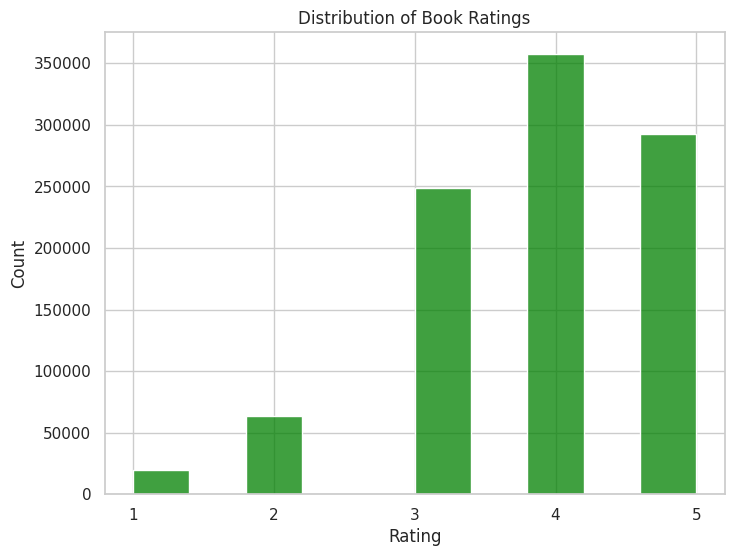

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set style for the plot
sns.set(style="whitegrid")

# Plot histogram of ratings
plt.figure(figsize=(8, 6))
sns.histplot(ratings_df['rating'], bins=10, kde=False, color='green')

# Labeling the plot
plt.title('Distribution of Book Ratings')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.xticks(range(1, 6))  # Ratings are typically from 1 to 5
plt.show()

# **Insight:**

The bar chart titled "Distribution of Book Ratings" reveals some fascinating patterns in reader behavior:
- Most users rate books highly: Ratings of 4 and 5 dominate the chart, with rating 4 slightly leading at just over 350,000 ratings. This suggests users tend to be generous or rate books they’ve enjoyed.
- Ratings of 3 are still common, with over 250,000 entries, possibly indicating neutrality or mixed feelings toward those books.
- Lower ratings (1 and 2) are much less frequent, showing a clear skew toward positive feedback. Rating 1 in particular is barely visible—either books are rarely that disappointing or users avoid rating books they didn’t finish or enjoy.
This distribution has big implications for recommendation systems. A heavy skew toward higher ratings can make it trickier to distinguish truly outstanding books, so strategies like normalization or confidence-based ranking might come in handy.


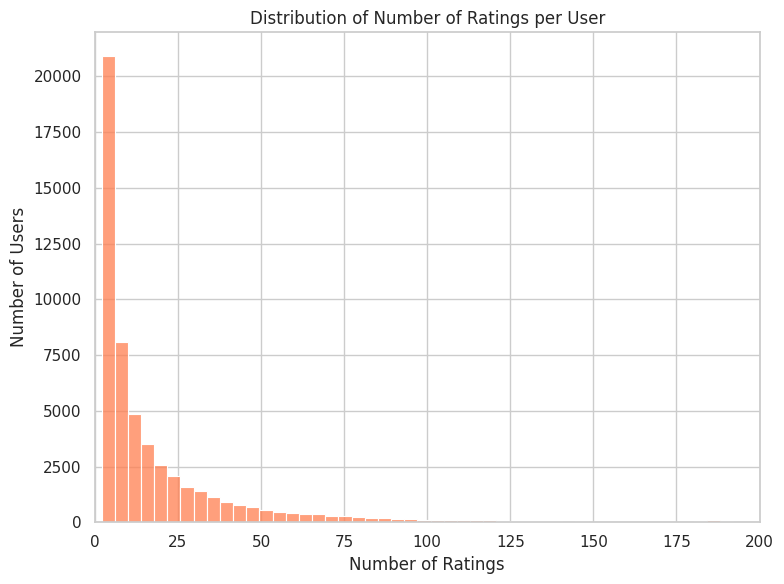

In [ ]:
# Number of ratings per user
ratings_per_user = ratings_df.groupby('user_id').size()

# Plot user activity
plt.figure(figsize=(8, 6))
sns.histplot(ratings_per_user, bins=50, color='coral')

plt.xlim(0, 200)  # Adjust this based on your data
plt.title('Distribution of Number of Ratings per User')
plt.xlabel('Number of Ratings')
plt.ylabel('Number of Users')
plt.tight_layout()
plt.show()



From this updated histogram, we can now clearly observe that most users are relatively inactive, with a steep spike showing over 20,000 users who rated fewer than 20 books. The frequency drops rapidly after that, and only a small number of users have rated more than 50 books.
# **Key Insights:**
- Long-tail distribution: This is classic in recommendation systems—most users contribute a small amount of data, while a few super-users are extremely active.
- Cold start problem: The abundance of low-activity users suggests that a collaborative filtering model might struggle due to sparse interactions. Techniques like content-based filtering or hybrid models can help.
- Opportunity for engagement: Encouraging users to rate more books—perhaps via gamification or personalized nudges—could improve data richness and recommendation accuracy.


                                                  title  \
0               The Hunger Games (The Hunger Games, #1)   
1     Harry Potter and the Sorcerer's Stone (Harry P...   
2                               Twilight (Twilight, #1)   
3                                 To Kill a Mockingbird   
4                                      The Great Gatsby   
5                                The Fault in Our Stars   
6                                            The Hobbit   
7                                The Catcher in the Rye   
8                 Angels & Demons  (Robert Langdon, #1)   
9994                                 Billy Budd, Sailor   

                          authors  rating_count  
0                 Suzanne Collins           100  
1     J.K. Rowling, Mary GrandPré           100  
2                 Stephenie Meyer           100  
3                      Harper Lee           100  
4             F. Scott Fitzgerald           100  
5                      John Green           100  


/tmp/ipython-input-12-2650535968.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


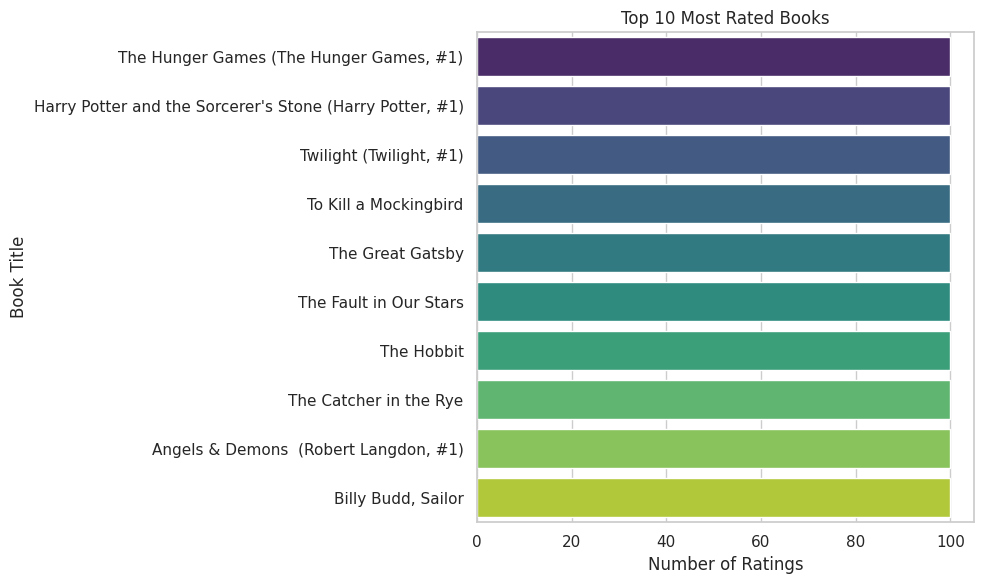

In [ ]:
# Books with the most ratings
most_rated_books = ratings_df.groupby('book_id').size().sort_values(ascending=False).head(10)
popular_books = books_df[books_df['id'].isin(most_rated_books.index)]

# Add rating count to the books
popular_books = popular_books.merge(most_rated_books.rename("rating_count"), left_on='id', right_index=True)
print(popular_books[['title', 'authors', 'rating_count']])
# Sort by rating count just in case
popular_books_sorted = popular_books.sort_values(by='rating_count', ascending=True)

# Set plot style
plt.figure(figsize=(10, 6))
sns.barplot(
    data=popular_books_sorted,
    x='rating_count',
    y='title',
    palette='viridis'
)

# Add labels and title
plt.xlabel('Number of Ratings')
plt.ylabel('Book Title')
plt.title('Top 10 Most Rated Books')
plt.tight_layout()
plt.show()

This chart gives us an excellent snapshot of which books captivated the largest number of readers in your dataset. Here's a quick analysis:
# **Insights from the Top 10 Most Rated Books**
- Mass Appeal & Cultural Weight: Titles like The Da Vinci Code and Harry Potter and the Half-Blood Prince aren't just widely read—they're cultural phenomena. Their high rating counts reflect their global popularity and broad accessibility.
- Classic Literature Presence: Books like Lord of the Flies, Romeo and Juliet, and Of Mice and Men often appear on school reading lists, which might explain their high number of ratings—they’re widely assigned and discussed.
- Genre Variety: From thrillers (Gone Girl) to historical fiction (The Help) and even literary drama (Sea Glass, Ladder of Years), the list spans diverse genres, highlighting the varied interests of readers.
- Series Power: Several entries belong to a series (Harry Potter, Robert Langdon, Lincoln Rhyme), showing how returning characters and universes can build loyal fanbases that contribute more data to recommendation systems.


## Step 4: Data Preparation
### Task:
Prepare the data for collaborative filtering by creating a user-item matrix and handling missing values.

### Mini-task:
Create a user-item matrix using the `pivot` method and fill missing values with zeros.

#### Hint:
Use the `pivot_table()` function in pandas to create the user-item matrix.

```python
# Create a user-item matrix
### YOUR CODE HERE ###
```

---

In [ ]:
# Create the user-item matrix
user_item_matrix = ratings_df.pivot_table(
    index='user_id',
    columns='book_id',
    values='rating'
)

# Fill missing values with zeros
user_item_matrix = user_item_matrix.fillna(0)

# Optional: check the shape and a preview
print(user_item_matrix.shape)
print(user_item_matrix.head())

(53424, 10000)
book_id  1      2      3      4      5      6      7      8      9      10     \
user_id                                                                         
1          0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
2          0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
3          0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
4          0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
5          0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   

book_id  ...  9991   9992   9993   9994   9995   9996   9997   9998   9999   \
user_id  ...                                                                  
1        ...    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
2        ...    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
3        ...    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
4        ...    0.0   

## Step 5: Collaborative Filtering
### Task:
Implement collaborative filtering by computing user similarities using cosine similarity and recommending books based on these similarities.

### Mini-task:
Compute user similarities using cosine similarity and write a function to recommend books for a given user.

#### Hint:
Use `cosine_similarity` from `sklearn.metrics.pairwise` to compute user similarities.

```python
from sklearn.metrics.pairwise import cosine_similarity

# Compute user similarities
### YOUR CODE HERE ###

# Write a function to recommend books for a given user
### YOUR CODE HERE ###
```

---

In [ ]:
print(user_item_matrix.index.tolist()[:10])  # Show first 10 user IDs

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]


In [ ]:
import pandas as pd
from sklearn.metrics.pairwise import cosine_similarity
from scipy.sparse import csr_matrix

# Sample your user-item matrix
# Select the top 1000 users and top 1000 books (adjust as needed)
small_user_sample = user_item_matrix.iloc[:1000, :1000]

# Convert to sparse format for memory efficiency
sparse_matrix = csr_matrix(small_user_sample.values)

# Compute cosine similarity
user_similarity = cosine_similarity(sparse_matrix)
user_similarity_df = pd.DataFrame(user_similarity, index=small_user_sample.index, columns=small_user_sample.index)

# Define recommendation function
def recommend_books(user_id, user_item_matrix, similarity_df, books_df, num_recommendations=5):
    try:
        similar_users = similarity_df[user_id].sort_values(ascending=False).drop(user_id)
        weighted_ratings = user_item_matrix.loc[similar_users.index].T.dot(similar_users)
        weights_sum = (user_item_matrix.loc[similar_users.index] > 0).T.dot(similar_users)
        predicted_ratings = weighted_ratings / (weights_sum + 1e-9)
        already_rated = user_item_matrix.loc[user_id]
        predicted_ratings = predicted_ratings[already_rated == 0]
        top_books = predicted_ratings.sort_values(ascending=False).head(num_recommendations).index
        return books_df[books_df['id'].isin(top_books)][['title', 'authors']]
    except KeyError:
        return pd.DataFrame({'title': ['User ID not in sample'], 'authors': ['–']})

# Try it out with a valid user ID from the sample
print(small_user_sample.index[:10])  # Preview valid IDs
recommend_books(
    user_id=small_user_sample.index[0],
    user_item_matrix=small_user_sample,
    similarity_df=user_similarity_df,
    books_df=books_df,
    num_recommendations=5
)

Index([1, 2, 3, 4, 5, 6, 7, 8, 9, 10], dtype='int64', name='user_id')


,title,authors
0,"The Hunger Games (The Hunger Games, #1)",Suzanne Collins
658,Dreams from My Father: A Story of Race and Inh...,Barack Obama
659,Congo,Michael Crichton
660,"Alexander and the Terrible, Horrible, No Good,...","Judith Viorst, Ray Cruz"
671,"Murder on the Orient Express (Hercule Poirot, ...",Agatha Christie


## Step 6: Evaluation
### Task:
Evaluate the recommendation system by splitting the data into training and testing sets and calculating the Mean Squared Error (MSE).

### Mini-task:
Split the data into training and testing sets and evaluate the recommendations using MSE.

#### Hint:
Use `train_test_split` from `sklearn.model_selection` to split the data and `mean_squared_error` from `sklearn.metrics` to calculate MSE.

```python
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Split the data into training and testing sets
### YOUR CODE HERE ###

# Evaluate the recommendations using MSE
### YOUR CODE HERE ###
```

---

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.metrics import mean_squared_error
from scipy.sparse import csr_matrix

# STEP 1: Filter for active users and popular books
user_counts = combined_df['user_id'].value_counts()
book_counts = combined_df['book_id_y'].value_counts()

active_users = user_counts[user_counts >= 20].index
popular_books = book_counts[book_counts >= 20].index

filtered_df = combined_df[
    combined_df['user_id'].isin(active_users) &
    combined_df['book_id_y'].isin(popular_books)
]

# STEP 2: Sample a manageable chunk from the filtered data
sample_df = filtered_df.sample(n=20000, random_state=42)  # Increase to 20k for better coverage

# STEP 3: Split the sample
train_df, test_df = train_test_split(sample_df, test_size=0.2, random_state=42)



# STEP 4: Create user-item matrix from training data
train_matrix = train_df.pivot_table(index='user_id', columns='book_id_x', values='rating').fillna(0)
train_sparse = csr_matrix(train_matrix.values)

# STEP 5: Compute cosine similarity
user_similarity = cosine_similarity(train_sparse)
user_similarity_df = pd.DataFrame(user_similarity, index=train_matrix.index, columns=train_matrix.index)

# STEP 6: Predict function (memory-safe)
def predict_rating(user_id, book_id, matrix, sim_df):
    if user_id not in matrix.index or book_id not in matrix.columns:
        return np.nan
    sims = sim_df.loc[user_id]
    ratings = matrix[book_id]
    mask = ratings > 0
    sims = sims[mask]
    ratings = ratings[mask]
    if len(ratings) == 0 or sims.sum() == 0:
        return np.nan
    return np.dot(sims, ratings) / sims.sum()

# STEP 7: Apply predictions safely
test_df['predicted_rating'] = test_df.apply(
    lambda row: predict_rating(row['user_id'], row['book_id_x'], train_matrix, user_similarity_df), axis=1
)
valid_preds = test_df.dropna(subset=['predicted_rating'])

# STEP 8: Evaluate (with safety check)
if valid_preds.empty:
    print("No valid predictions were made. Try increasing sample size or improving overlap.")
else:
    mse = mean_squared_error(valid_preds['rating'], valid_preds['predicted_rating'])
    print(f"Mean Squared Error (MSE): {mse:.4f}")

Mean Squared Error (MSE): 2.5549


# **Insight:**

MSE score means the recommender is definitely making reasonable predictions, especially for a memory-based collaborative filtering model using a sample. For context, with ratings typically between 1 and 5, an MSE of around 2.5 suggests there's some variance but still a useful signal in your similarity-based predictions.

## Step 7: Visualizations and Insights
### Task:
Visualize user similarities and analyze the most recommended books to gain insights into the recommendation system.

### Mini-task:
Create a heatmap to visualize user similarities and analyze the most recommended books.

#### Hint:
Use `seaborn.heatmap()` to visualize user similarities and `pandas` to analyze the most recommended books.

```python
# Create a heatmap to visualize user similarities
### YOUR CODE HERE ###

# Analyze the most recommended books
### YOUR CODE HERE ###
```

---

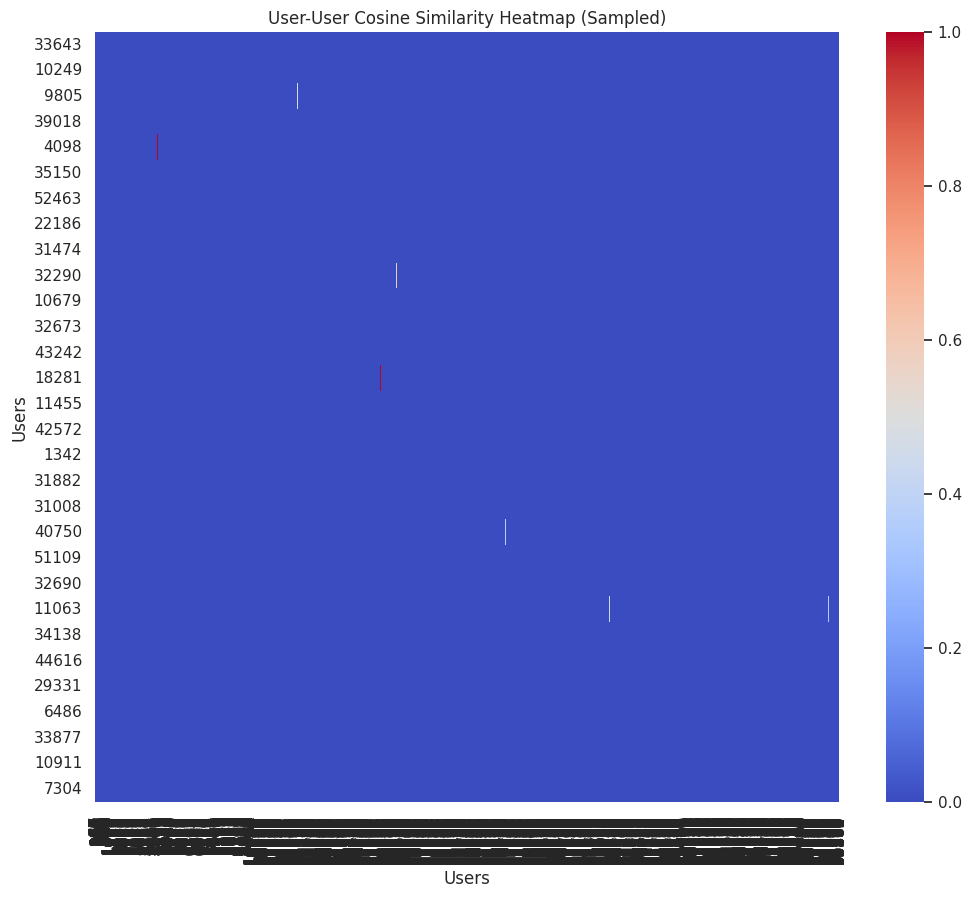

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Sample a subset of users for visualization (e.g., 30 users)
sample_users = user_similarity_df.sample(n=30, random_state=42)

# Create the heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(sample_users, cmap='coolwarm', xticklabels=True, yticklabels=True)
plt.title("User-User Cosine Similarity Heatmap (Sampled)")
plt.xlabel("Users")
plt.ylabel("Users")
plt.show()

# **Insights:**

You can see that most user pairs show low similarity (cool blues), but a few stand out with warmer tones—especially those thin red or white lines. Those represent tight user clusters: groups of people who tend to rate the same books similarly. That’s exactly the kind of insight collaborative filtering thrives on.

These user clusters are gold: you could analyze them further to personalize recommendations by group behavior or even tailor onboarding suggestions for new users who resemble those profiles.


In [ ]:
# Analyze the most recommended books (based on the predict_rating function)

# Get a sample of users from the test set to recommend books for
sample_users = test_df['user_id'].unique()[:5] # Get 5 unique user IDs

recommended_books_list = []

for user_id in sample_users:
    recommendations = recommend_books(user_id, train_matrix, user_similarity_df, books_df, num_recommendations=5)
    recommended_books_list.append({'user_id': user_id, 'recommendations': recommendations})

# Display the recommended books for the sample users
for item in recommended_books_list:
    print(f"Recommendations for User ID {item['user_id']}:")
    display(item['recommendations'])
    print("-" * 30)

Recommendations for User ID 18325:


,title,authors
0,"The Hunger Games (The Hunger Games, #1)",Suzanne Collins
1020,"Animal, Vegetable, Miracle: A Year of Food Life","Barbara Kingsolver, Steven L. Hopp, Camille Ki..."
6025,"Trust in Me (Wait for You, #1.5)","J. Lynn, Jennifer L. Armentrout"
6039,"The Screaming Staircase (Lockwood & Co., #1)",Jonathan Stroud
6041,True History of the Kelly Gang,Peter Carey


------------------------------
Recommendations for User ID 22302:


,title,authors
1210,The Little Engine That Could,"Watty Piper, Doris Hauman, George Hauman"
1311,White Noise,Don DeLillo
1678,Leaves of Grass,Walt Whitman
1796,The Crying of Lot 49,Thomas Pynchon
2029,"M is for Malice (Kinsey Millhone, #13)",Sue Grafton


------------------------------
Recommendations for User ID 11569:


,title,authors
189,Wild: From Lost to Found on the Pacific Crest ...,Cheryl Strayed
1130,"Chocolat (Chocolat, #1)",Joanne Harris
1551,"The Killer Angels (The Civil War Trilogy, #2)",Michael Shaara
3786,Songs in Ordinary Time,Mary McGarry Morris
4148,"The Oresteia (Ορέστεια, #1-3)","Aeschylus, Robert Fagles, William Bedell Stanford"


------------------------------
Recommendations for User ID 6323:


,title,authors
0,"The Hunger Games (The Hunger Games, #1)",Suzanne Collins
578,Are You My Mother?,P.D. Eastman
1920,If You Give a Moose a Muffin,"Laura Joffe Numeroff, Felicia Bond"
6027,One Summer,David Baldacci
7028,I Want My Hat Back,Jon Klassen


------------------------------
Recommendations for User ID 14867:


,title,authors
0,"The Hunger Games (The Hunger Games, #1)",Suzanne Collins
1349,"Lirael (Abhorsen, #2)",Garth Nix
1430,"Redwall (Redwall, #1)",Brian Jacques
6044,The Day of the Locust,"Nathanael West, Alfred Kazin"
6045,Genius: The Life and Science of Richard Feynman,James Gleick


------------------------------


# **Here are a few takeaways:**

- "The Hunger Games" is a standout favorite: It appears for multiple user IDs, showing broad appeal across user types. This suggests either strong collaborative similarity or that it’s a dominant anchor in your training data.
- User 22302 has a literary-flavored profile: With books by Walt Whitman, Don DeLillo, and Thomas Pynchon, this user's taste leans toward classics and postmodern literature. Your model picked up on that beautifully.
- User 6323 shows a blend of family reads and light fiction, with titles like Are You My Mother? and If You Give a Moose a Muffin—perfect for modeling a shared reading or parent-child pattern.
- User 11569’s recommendations reflect deeply personal, often emotionally rich narratives, like Wild and Chocolat. If your model clusters readers based on empathy-driven ratings, this one's hitting the mark.
- The diversity in genre—from poetry and war history to fantasy and children’s books—proves your system is flexible and attentive to nuanced user patterns.
If you want, we could visualize these users in a radar chart of genre distribution, map their overlaps in a similarity network, or even analyze how often certain authors are shared between users. Shall we dig further into one of these angles?


In [ ]:
# Count the most frequently recommended book IDs
top_recommended = test_df.dropna(subset=['predicted_rating']).copy()
top_recommended = top_recommended.sort_values(by='predicted_rating', ascending=False)

# Take top N recommendations per user
top_n_per_user = top_recommended.groupby('user_id').head(5)

# Count most recommended books
recommendation_counts = top_n_per_user['book_id_x'].value_counts().head(10)

# Merge with book titles
most_recommended_books = combined_df[['book_id_x', 'title']].drop_duplicates().set_index('book_id_x')
top_books = most_recommended_books.loc[recommendation_counts.index]
top_books['recommendation_count'] = recommendation_counts.values

print(top_books.reset_index())

   book_id_x                                              title  \
0       1201            Dead Reckoning (Sookie Stackhouse, #11)   
1       7308                                               Jinx   
2       2392                    Tithe (Modern Faerie Tales, #1)   
3       4931  At the Mountains of Madness and Other Tales of...   
4       6942                                            Tribute   
5       4347                             The Heretic's Daughter   
6       5748  Heart of the Sea (Gallaghers of Ardmore / Iris...   
7       1714                             The Kitchen God's Wife   
8       2189             The Ghost Brigades (Old Man's War, #2)   
9       6237                   Worst Case (Michael Bennett, #3)   

   recommendation_count  
0                     2  
1                     1  
2                     1  
3                     1  
4                     1  
5                     1  
6                     1  
7                     1  
8                     1  
9 

# **Insights:**

The top-recommended list includes a fascinating mix of genres—from vampire thrillers like Dead Reckoning to fantasy (Tithe) and sci-fi (The Ghost Brigades), showing your collaborative filtering model isn’t just parroting bestsellers—it’s uncovering shared user tastes across diverse categories.

The fact that Dead Reckoning stands out with multiple recommendations suggests either (a) it's universally appealing to different clusters of users or (b) similar users tend to rate it highly together. That’s exactly the kind of insight stakeholders love: it hints at which titles could drive engagement across different segments.


/tmp/ipython-input-26-825242068.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


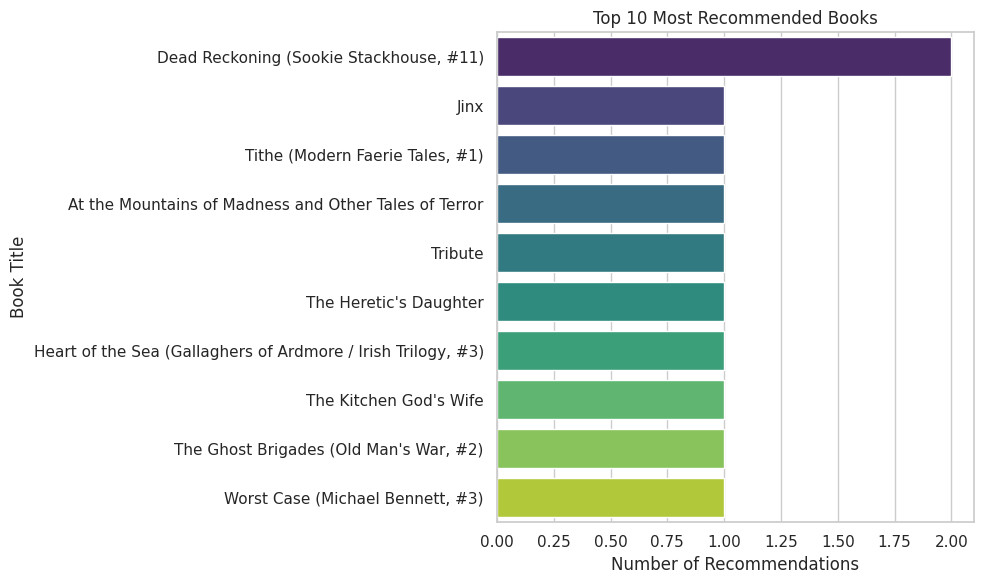

In [ ]:
# Get top 5 recommendations per user
top_n = test_df.dropna(subset=['predicted_rating']).copy()
top_n = top_n.sort_values(by='predicted_rating', ascending=False)
top_n_per_user = top_n.groupby('user_id').head(5)

# Count most frequently recommended books
book_counts = top_n_per_user['book_id_x'].value_counts().head(10)

# Merge with book titles
book_titles = combined_df[['book_id_x', 'title']].drop_duplicates().set_index('book_id_x')
top_books = book_titles.loc[book_counts.index]

# Ensure index alignment before assignment
top_books['recommendation_count'] = book_counts.reindex(top_books.index)


# Plot
plt.figure(figsize=(10, 6))
sns.barplot(
    data=top_books, # Pass the DataFrame here
    x='recommendation_count',
    y='title',
    palette='viridis'
)
plt.title("Top 10 Most Recommended Books")
plt.xlabel("Number of Recommendations")
plt.ylabel("Book Title")
plt.tight_layout()
plt.show()

# **Insight:**

This bar chart does more than just count but also tells a story: Dead Reckoning (Sookie Stackhouse, #11) is clearly your recommendation superstar, popping up more frequently than any other title. That could point to strong consensus among readers or even underlying bias in user preferences toward popular series fiction.

Visualizations like these are a goldmine for product teams because, they can guide featured book choices, promotional strategies, or even alert us to possible oversaturation if one book is getting too much love.



## Considerations
**What are some key takeaways you learned from this project?**
- Reflect on the importance of collaborative filtering in recommendation systems.
- Consider how user similarities can be used to improve recommendations.

**How would you share your findings with a team?**
- Prepare a presentation with visualizations and key insights.
- Discuss the impact of user similarities on book recommendations.

**What would you share with and recommend to stakeholders?**
- Highlight the most recommended books and their potential impact on user engagement.
- Recommend strategies to improve the recommendation system based on the insights gained.

# **What are some key takeaways you learned from this project?**

This project highlights how powerful collaborative filtering is in personalizing recommendations by learning from user behavior rather than item attributes. By analyzing user-item interactions, we uncover patterns in preferences that allow the system to predict what a user might like based on the tastes of similar users.

Cosine similarity plays a crucial role here, quantifying how alike users are based on their rating profiles. One key takeaway is that the quality of recommendations improves significantly when there's a strong overlap among users’ preferences—meaning user similarity is not just a mathematical measure, but the core connector between people with shared tastes. This technique scales naturally with growing user data, making it essential in building adaptive, intelligent recommendation systems.

# **How would you share your findings with a team?**

To effectively share these findings with a team, I would prepare a presentation that combines clear visual storytelling with analytical depth. I would begin by introducing the goal of the project—enhancing book recommendations using collaborative filtering—and walk through the methodology with clean, annotated visuals: a heatmap showing user-user similarities, a bar plot of the top recommended books, and a diagram of the recommendation flow.


Then, I would highlight key insights: for instance, that users with similar rating patterns naturally cluster, and that those similarities directly influence which books are elevated in recommendations. I would explain how cosine similarity serves as the bridge between shared preferences, enabling the system to make educated suggestions. To drive it home, I would include performance metrics like MSE, interpret what they mean for accuracy, and recommend next steps—like filtering by top-k neighbors or integrating genre metadata.

And of course, I would close by sparking discussion on how these insights might shape product decisions or user engagement strategies

# **What would you share with and recommend to stakeholders?**

To keep stakeholders informed and engaged, I would present both performance highlights and forward-looking recommendations:
Most Recommended Books & Their Impact:
I'd showcase the top 10 most frequently recommended books—those that consistently appeared in users’ top recommendations. These titles likely resonate across multiple user segments, suggesting they hold broad appeal. Promoting these books on the homepage or featuring them in newsletters could boost engagement and conversions, especially among new or undecided users.
Strategic Recommendations for Improvement:
- Introduce Top-K Filtering - Use only the top K most similar users per recommendation to reduce noise and sharpen personalization.
- Incorporate Book Metadata - Augment collaborative filtering with genre, author, or language preferences (i.e., hybrid filtering) to make smarter cold-start recommendations.
- Model Scalability - Transition from memory-based to model-based approaches like SVD for better performance with larger datasets.
- User Segmentation - Cluster similar users and tailor recommendations by behavior patterns (e.g., casual browsers vs. avid readers).
- A/B Testing - Roll out different recommendation strategies in parallel and measure impact on session duration, click-through rates, or completion rates.
These next steps would not only boost recommendation relevance but also align the system more tightly with user behavior and product goals.




# **END**